In [2]:

import json
import os
import requests
import time
import pandas

file_path = '../results/raw_outputs/logged-samples/outputs_allenai/pretrained=allenai__OLMo-1B,trust_remote_code=True_pubmedqa.jsonl'

# Initialize a list to store all MESH terms
all_meshes = []

# Read the entire file content
with open(file_path, 'r') as file:
    file_content = file.read().strip()  # Read and strip unnecessary whitespace

# Attempt to parse the entire content assuming it's a properly formatted JSON array
try:
    data = json.loads(file_content)
    # Process each document in the JSON data
    for document in data:
        meshes = document['doc'].get('MESHES', [])
        all_meshes.extend(meshes)
except json.JSONDecodeError as e:
    print(f"Error decoding JSON: {e}")

# Remove duplicates by converting the list to a set, then back to a list
unique_meshes = list(set(all_meshes))

# Return the list of unique MESH terms
unique_meshes

['Analgesics',
 'Endocarditis, Bacterial',
 'Anatomic Landmarks',
 'Psychiatry',
 'Hernias, Diaphragmatic, Congenital',
 'Taiwan',
 'Vancomycin',
 'Drowning',
 'Poverty',
 'Fingers',
 'Saliva',
 'Nasal Mucosa',
 'Dehydroepiandrosterone Sulfate',
 'Schizophrenic Psychology',
 'Absorbable Implants',
 'Amblyopia',
 'Mass Screening',
 'Chest Pain',
 'Product Labeling',
 'Cause of Death',
 'Positive-Pressure Respiration',
 'Iris',
 'Sex Offenses',
 'Vasoconstrictor Agents',
 'Smoking',
 'Microscopy',
 'Fluorescent Antibody Technique, Indirect',
 'Group Processes',
 'Gonadotropin-Releasing Hormone',
 'Suicidal Ideation',
 'Aryldialkylphosphatase',
 'Social Class',
 'Urothelium',
 'Cluster Analysis',
 'Antigens, Tumor-Associated, Carbohydrate',
 'Hyperthermia, Induced',
 'Committee Membership',
 'Rabbits',
 'Career Mobility',
 'Ventilators, Mechanical',
 'Gestational Age',
 'Sternum',
 'Anesthetics, Intravenous',
 'Prosthesis-Related Infections',
 'Piperazines',
 'Drug Users',
 'Systemic Infl

In [1]:
import requests

data = {
    "corpus": "v4_piletrain_llama",
    "query_type": "count",
    "query": "test"
}

response = requests.post('https://api.infini-gram.io/', json=data)
print(response.json())


{'count': 70297986, 'latency': 1.015, 'token_ids': [1243], 'tokens': ['▁test']}


In [4]:
import pandas as pd
# Base URL for the API
api_url = 'https://api.infini-gram.io/'

# Function to get count from the API
def get_count(query):
    data = {
        "corpus": "v4_piletrain_llama", #The Pile Counts with Llama tokenizer
        "query_type": "count",
        "query": query
    }
    try:
        response = requests.post(api_url, json=data)
        response.raise_for_status()
        return response.json().get('count', 0)  # Return the count or 0 if not found
    except requests.RequestException as e:
        print(f"Error querying {query}: {str(e)}")
        return 0

# DataFrame to store the results
count_df = pd.DataFrame(columns=['Term', 'Count'])

# Process each term in the list
for term in unique_meshes:
    # Query for both original and lower case versions
    original_count = get_count(term)
    lower_count = get_count(term.lower()) if term.lower() != term else original_count
    
    # Sum the counts (avoid double-counting if the term is already in lowercase)
    total_count = original_count + lower_count if term.lower() != term else original_count
    
    # Append the result to the dataframe
    count_df = count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)


C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3219808032.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3219808032.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3219808032.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  count_df = count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3219808032.py:33: FutureWarning: The frame.append method is deprecated and will be remove

In [6]:

count_df.to_csv('mesh_infinigram_counts_pile.csv')

In [7]:
import pandas as pd
# Base URL for the API
api_url = 'https://api.infini-gram.io/'

# Function to get count from the API
def get_count(query):
    data = {
        "corpus": "v4_dolma-v1_6_llama", #Dolma counts with Llama tokenizer
        "query_type": "count",
        "query": query
    }
    try:
        response = requests.post(api_url, json=data)
        response.raise_for_status()
        return response.json().get('count', 0)  # Return the count or 0 if not found
    except requests.RequestException as e:
        print(f"Error querying {query}: {str(e)}")
        return 0

# DataFrame to store the results
dolma_count_df = pd.DataFrame(columns=['Term', 'Count'])

# Process each term in the list
for term in unique_meshes:
    # Query for both original and lower case versions
    original_count = get_count(term)
    lower_count = get_count(term.lower()) if term.lower() != term else original_count
    
    # Sum the counts (avoid double-counting if the term is already in lowercase)
    total_count = original_count + lower_count if term.lower() != term else original_count
    
    # Append the result to the dataframe
    dolma_count_df = dolma_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)

dolma_count_df.to_csv('mesh_infinigram_counts_dolma.csv')

C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3261427129.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dolma_count_df = dolma_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3261427129.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dolma_count_df = dolma_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3261427129.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dolma_count_df = dolma_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\3261427129.py:33: FutureWarning: The frame.append met

In [8]:
import pandas as pd
# Base URL for the API
api_url = 'https://api.infini-gram.io/'

# Function to get count from the API
def get_count(query):
    data = {
        "corpus": "v4_rpj_llama_s4", #RedPajama counts with Llama tokenizer
        "query_type": "count",
        "query": query
    }
    try:
        response = requests.post(api_url, json=data)
        response.raise_for_status()
        return response.json().get('count', 0)  # Return the count or 0 if not found
    except requests.RequestException as e:
        print(f"Error querying {query}: {str(e)}")
        return 0

# DataFrame to store the results
rpj_count_df = pd.DataFrame(columns=['Term', 'Count'])

# Process each term in the list
for term in unique_meshes:
    # Query for both original and lower case versions
    original_count = get_count(term)
    lower_count = get_count(term.lower()) if term.lower() != term else original_count
    
    # Sum the counts (avoid double-counting if the term is already in lowercase)
    total_count = original_count + lower_count if term.lower() != term else original_count
    
    # Append the result to the dataframe
    rpj_count_df = rpj_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)

rpj_count_df.to_csv('mesh_infinigram_counts_rpj.csv')

C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\1562415903.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rpj_count_df = rpj_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\1562415903.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rpj_count_df = rpj_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\1562415903.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  rpj_count_df = rpj_count_df.append({'Term': term, 'Count': total_count}, ignore_index=True)
C:\Users\Nikol\AppData\Local\Temp\ipykernel_11372\1562415903.py:33: FutureWarning: The frame.append method is depre

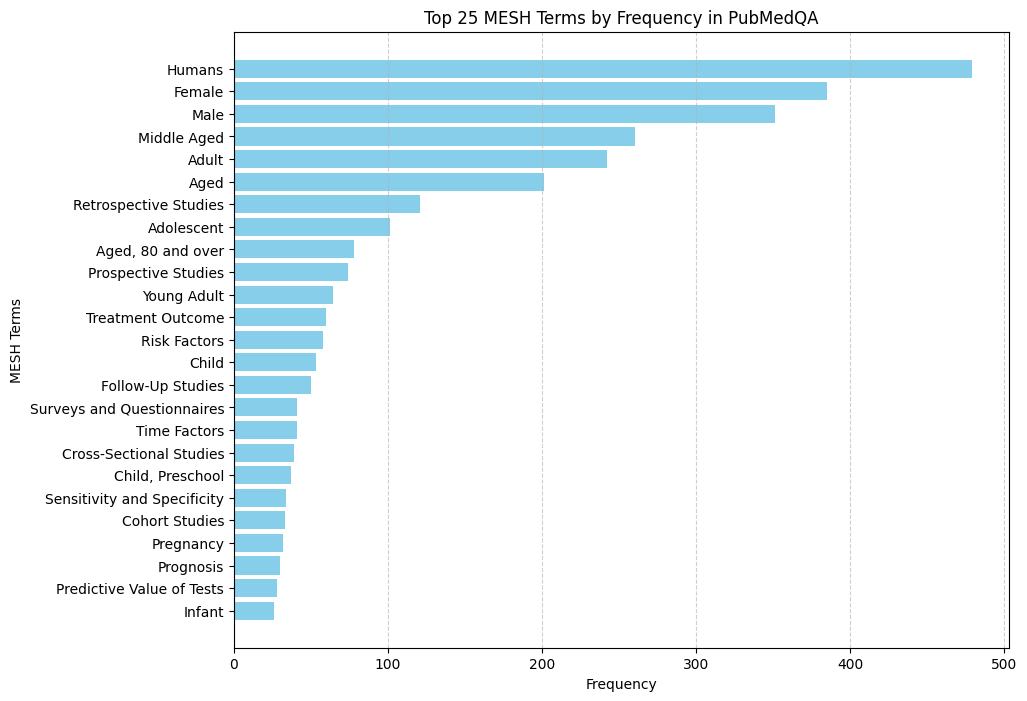

In [3]:
from collections import Counter
import matplotlib.pyplot as plt

# Reopen and read the file to count occurrences of each MESH term
with open(file_path, 'r') as file:
    file_content = file.read().strip()  # Read and strip unnecessary whitespace

# Load the data as a JSON object
data = json.loads(file_content)

# Initialize a Counter to store frequency of each MESH term
mesh_counter =  Counter()

# Accumulate counts for each MESH term across all documents
for document in data:
    meshes = document['doc'].get('MESHES', [])
    mesh_counter.update(meshes)

# Get the most common 25 MESH terms
top_25_meshes = mesh_counter.most_common(25)

# Prepare data for plotting
labels, values = zip(*top_25_meshes)

# Plotting
plt.figure(figsize=(10, 8))
plt.barh(labels[::-1], values[::-1], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('MESH Terms')
plt.title('Top 25 MESH Terms by Frequency in PubMedQA')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()